In [254]:
#implementação do circuito de adição proposto por Vedral, Barenco e Ekert, utilizando 3n bits, onde n é número de bits de cada operando

import qiskit

n = 2

qc = qiskit.QuantumCircuit(3*n + 1)

In [255]:
#qc_carry function recieves a 4 qubit circuit (carryIn, a, b, carryOut) sets the carry out value accondingly for the sum of a,b,carryIn
#qubits is a list with the index of the operands
def qc_carry(quantum_circuit: qiskit.QuantumCircuit, qubits: list[int]) -> qiskit.QuantumCircuit:
    quantum_circuit.ccx(qubits[1], qubits[2], qubits[3]) 
    quantum_circuit.cx(qubits[1], qubits[2]) 
    quantum_circuit.ccx(qubits[0], qubits[2], qubits[3]) 
    return quantum_circuit

#qc = qc_carry(qc, [0,1,2,3])

#inv_qc_carry is the inverse/reversed version of qc_carry
def inv_qc_carry(quantum_circuit: qiskit.QuantumCircuit, qubits: list[int]) -> qiskit.QuantumCircuit:
    quantum_circuit.ccx(qubits[0], qubits[2], qubits[3]) 
    quantum_circuit.cx(qubits[1], qubits[2]) 
    quantum_circuit.ccx(qubits[1], qubits[2], qubits[3]) 
    return quantum_circuit

#qc.draw(output=	"mpl")

In [256]:
#qc_sum function recieves a 3 qubit quantum circuit (a, b, s) and sets the value of s according to the result of the sum from a and b
#qubits is a list with the index of the operands
def qc_sum(quantum_circuit: qiskit.QuantumCircuit, qubits: list[int]) -> qiskit.QuantumCircuit:
    quantum_circuit.cx(qubits[1], qubits[2])
    quantum_circuit.cx(qubits[0], qubits[2])
    return quantum_circuit

#qc = qc_sum(qc, [0,1,2])

#inv_qc_sum is the inverse/reversed version of qc_sum
def inv_qc_sum(quantum_circuit: qiskit.QuantumCircuit, qubits: list[int]) -> qiskit.QuantumCircuit:
    quantum_circuit.cx(qubits[0], qubits[2])
    quantum_circuit.cx(qubits[1], qubits[2])
    return quantum_circuit


#qc.draw(output="mpl")

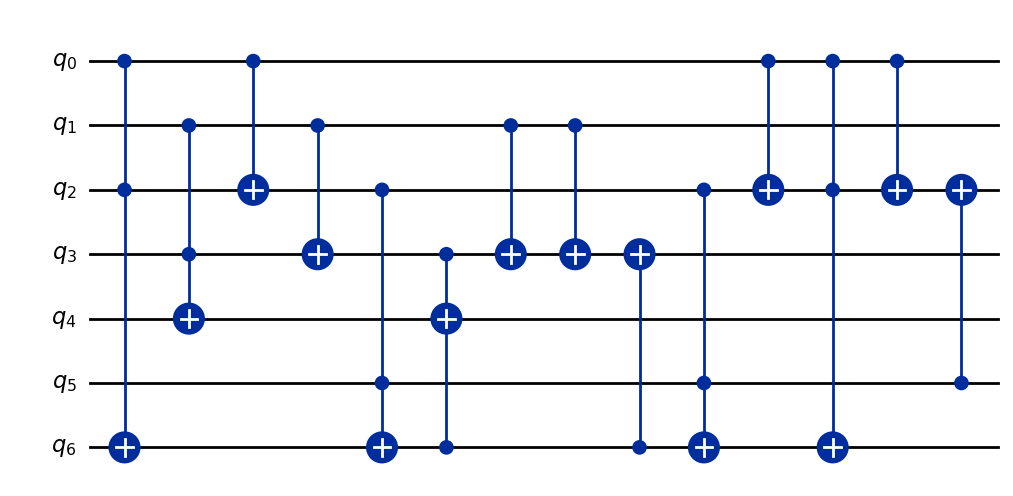

In [257]:
#qc_adder funcion implements the adder circuit, (a,b) -> (a,a+b) using 3n bits, n = number of bits for each operand, operand b has an extra 0 bit to hold the final carry
#first n bits are from operand a, next n bits from b, the rest are work bits c
def qc_adder(quantum_circuit: qiskit.QuantumCircuit, n: int) -> qiskit.QuantumCircuit:
    for i in range(n):
        quantum_circuit = qc_carry(quantum_circuit, [2*n+1+i, i, n+i, 2*n+2+i if i != n-1 else 2*n])
    quantum_circuit.cx(n-1, 2*n-1)
    quantum_circuit = qc_sum(quantum_circuit, [3*n, n-1, 2*n-1])
    for i in range(n-1):
        quantum_circuit = inv_qc_carry(quantum_circuit, [3*n-1-i, n-2-i, 2*n-2-i, 3*n-i])
        quantum_circuit = qc_sum(quantum_circuit, [3*n-1-i, n-2-i, 2*n-2-i])
    return quantum_circuit
qc = qc_adder(qc, n)
qc.draw(output="mpl")

In [262]:
from qiskit.quantum_info import Statevector
test_n = 3
test_circ = qiskit.QuantumCircuit(3*test_n + 1)
test_circ = qc_adder(test_circ,test_n)
#test_circ.draw("mpl")
Statevector.from_label("0000110101").evolve(test_circ).draw("latex")

<IPython.core.display.Latex object>